<a href="https://colab.research.google.com/github/0x-nzht/ORDS/blob/main/%E3%83%AA%E3%82%B9%E3%82%AF%E3%83%9E%E3%83%8D%E3%82%B8%E3%83%A1%E3%83%B3%E3%83%88%E3%81%AE%E6%95%B0%E7%90%86%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考：https://core.ac.uk/download/pdf/188810056.pdf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

!pip install japanize-matplotlib
import japanize_matplotlib
japanize_matplotlib.japanize()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### 各種設定

In [ ]:
df = pd.DataFrame({
    "発生確率": [0.4, 0.1, 0.3, 0.2, 0.1, 0.2, 0.1, 0.3, 0.2, 0.1],
    "遅延日数": [10, 15, 4, 11, 5, 7, 13, 4, 7, 9],
    "リスク対策": [True, False, True, False, False, False, False, False, False, False]
})

delay_limit = 20
target_risk_prob = 0.8

#### 計算 and 描画

In [ ]:
num_risks = len(df)
max_delay = df["遅延日数"].sum()

prob_x_u_leq_x = np.zeros(max_delay+1)
prob_take_measure = np.zeros(max_delay+1)
num_trials = 10000
for i in range(num_trials):
    probs = np.random.rand(num_risks)
    x_u = df[df["発生確率"] > probs]["遅延日数"].sum()
    x_take_measure = df[(df["発生確率"] > probs) & ~(df["リスク対策"])]["遅延日数"].sum()
    prob_x_u_leq_x[x_u:] += 1 / num_trials
    prob_take_measure [x_take_measure:] += 1 / num_trials

[]

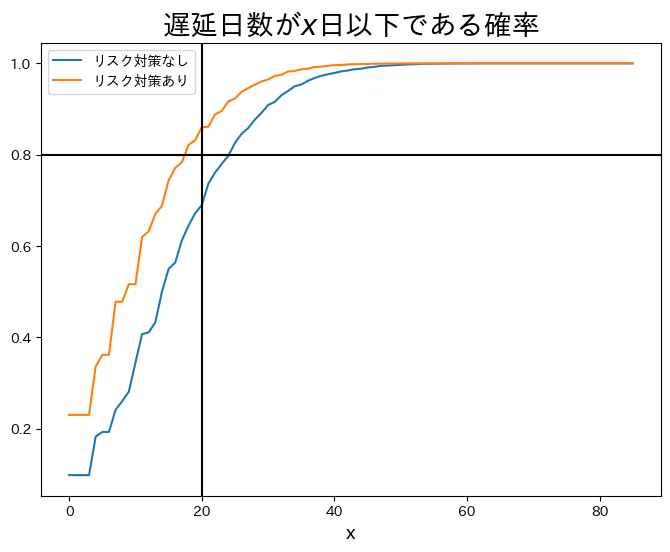

In [ ]:
fig = plt.figure(figsize=(8.0, 6.0), dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.set_title("遅延日数が$x$日以下である確率", size=20)
ax.set_xlabel("x", size = 14)
ax.plot(prob_x_u_leq_x, label="リスク対策なし")
ax.plot(prob_take_measure, label="リスク対策あり")
ax.axhline(y=target_risk_prob, color="black")
ax.axvline(x=delay_limit, color="black")
ax.legend()
plt.plot()


#### おまけ

In [ ]:
# 参照文献に則って計算する場合

prob_x_u_leq_x = np.zeros(max_delay+1)
prob_x_t_eq_x = np.zeros(max_delay+1)
prob_take_measure = np.zeros(max_delay+1)
num_trials = 10000
for i in range(num_trials):
    probs = np.random.rand(num_risks)
    x_u = df[df["発生確率"] > probs]["遅延日数"].sum()
    x_t = df[(df["発生確率"] > probs) & (df["リスク対策"])]["遅延日数"].sum()
    x_take_measure = df[(df["発生確率"] > probs) & ~(df["リスク対策"])]["遅延日数"].sum()
    prob_x_u_leq_x[x_u:] += 1 / num_trials
    prob_x_t_eq_x[x_t] += 1 / num_trials
    prob_take_measure [x_take_measure:] += 1 / num_trials

prob_x_u_minus_t_leq_x = np.zeros(max_delay+1)
for x in range(max_delay+1):
    sum = 0
    for i in range(1, x+1):
        sum += prob_x_t_eq_x[i] * prob_x_u_minus_t_leq_x[x-i]
    prob_x_u_minus_t_leq_x[x] = (prob_x_u_leq_x[x] - sum) / prob_x_t_eq_x[0]